In [1]:
import heartpy as hp
import matplotlib.pyplot as plt

/home/soph/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


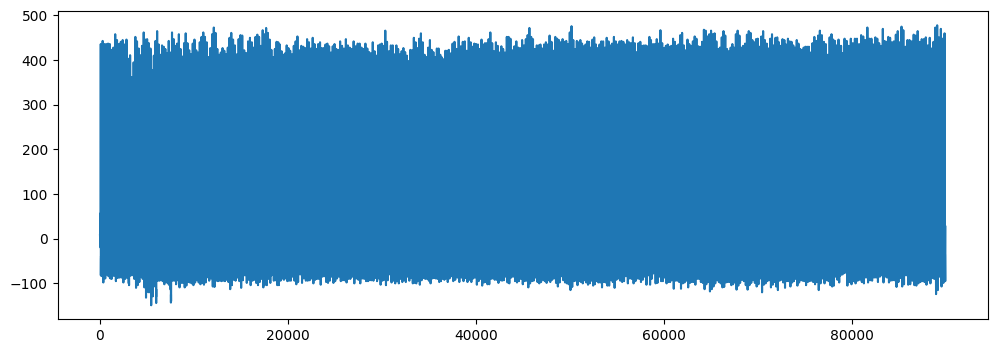

In [2]:
data = hp.get_data('ecg_signal_L9_16-02_16-08.csv')

plt.figure(figsize=(12,4))
plt.plot(data)
plt.show()

What this will do is segment the data into sections of 40 seconds each. In this example each window will have an overlap with the previous window of 25%, meaning each iteration the 40 second window moves by 30 seconds.

bpm: 77.164904
ibi: 777.555556
sdnn: 27.588690
sdsd: 16.027658
rmssd: 25.813813
pnn20: 0.352941
pnn50: 0.058824
hr_mad: 24.000000
sd1: 18.057961
sd2: 34.027467
s: 1930.404013
sd1/sd2: 0.530688
breathingrate: 0.357245


/home/soph/.local/lib/python3.10/site-packages/heartpy/visualizeutils.py:119: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1200x400 with 0 Axes>

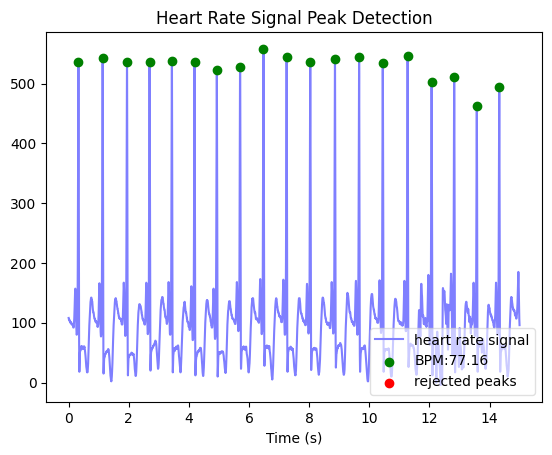

In [3]:
#run analysis
sample_rate = 250
wd, m = hp.process(data[0:15*250], sample_rate)


#visualise in plot of custom size
plt.figure(figsize=(12,4))
hp.plotter(wd, m)

# display computed measures
for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [4]:
wd.keys()

dict_keys(['hr', 'sample_rate', 'peaklist', 'ybeat', 'rolling_mean', 'RR_list', 'RR_indices', 'RR_diff', 'RR_sqdiff', 'rrsd', 'best', 'removed_beats', 'removed_beats_y', 'binary_peaklist', 'RR_masklist', 'RR_list_cor', 'nn20', 'nn50', 'poincare', 'breathing_signal', 'breathing_psd', 'breathing_frq'])

In [6]:
wd['hr']

array([108., 107., 106., ..., 106., 100.,  96.])

In [5]:
print(len(wd['hr']))

3750


In [9]:
wd, m = hp.process_segmentwise(data, sample_rate=250.0, segment_width = 15, segment_overlap = 0)
print(m['bpm'])
print(len(m['bpm']))

[77.16490425835953, 84.43568815085843, 81.21972071815333, 79.38718662952647, 77.6978417266187, 78.16785518376302, 76.44394110985277, 74.83370288248337, 79.01668129938543, 80.42895442359249, 74.21420256111757, 75.65144298122723, 76.37906647807638, 79.83193277310924, 76.92307692307692, 76.57402155416904, 78.125, 78.99113082039912, 77.78738115816768, 80.16877637130801, 76.57402155416904, 69.74716652136007, 74.2370085235084, 72.71171941830625]
24


In [15]:
len(m['bpm'])

13

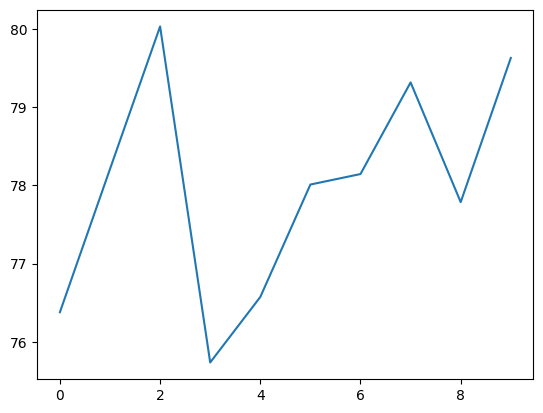

In [26]:
plt.plot(m['bpm'])

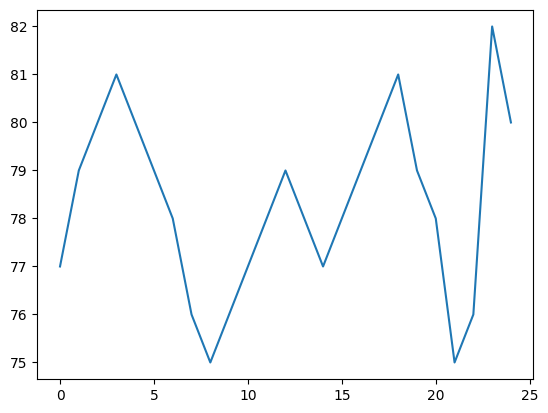

In [51]:
gt = [77, 79, 80, 81, 80, 79, 78, 76, 75, 76, 77, 78, 79, 78, 77, 78, 79, 80, 81, 79, 78, 75, 76, 82, 80]
plt.plot(gt)


77
79
80
81
80
79
78
76
75
76
77
78
79
78
77
78
79
80
81
79
78
75
76
82
80

(25)

In [6]:
# 1560 FRAMES
with open("sp02_L9.txt", "r") as f:
    lines = f.readlines()

values = lines[2].split()
count = len(values)

print(count)

2997


In [2]:
import cv2

cap = cv2.VideoCapture("L9-11-12-2025-16-04.avi")

frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
cap.release()

print(frame_count)

2997


In [ ]:
import numpy as np
wd, m = hp.process(
            ecg_segment,
            sample_rate=fs,
            clean_ecg=True,
            report_time=False
        )

# HeartPy returns bpm values per beat
hr_values = wd['hr']


values = np.median(hr_values)